In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
  
pd.set_option('display.max_rows', 15)
np.random.seed(5)

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [3]:
bowler = pd.read_csv('bowlers_for_clustering.csv')

In [4]:
bowler

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank
0,PP Chawla,CSK/KKR/KXIP/MI,26.60,20.05,7.96,20.149,1.005,0.010,0.974,26.743,35.289,Good
1,DJ Bravo,CSK/GL/MI,23.82,17.04,8.38,19.728,1.158,0.013,1.122,27.595,33.269,Good
2,B Kumar,PWI/SRH,27.23,21.60,7.56,22.207,1.028,0.023,0.948,28.006,34.310,Good
3,SP Narine,KKR,25.39,22.63,6.73,23.283,1.029,0.046,0.880,26.120,28.479,Best
4,R Ashwin,CSK/DC/KXIP/RPS/RR,29.82,25.13,7.12,21.750,0.865,0.005,0.850,25.812,35.386,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
65,PJ Sangwan,DC/GL/GT/KKR/MI,32.63,22.52,8.69,20.343,0.905,0.000,0.905,29.524,47.259,Poor
66,DE Bollinger,CSK,18.72,15.56,7.21,21.333,1.370,0.037,1.269,25.667,22.495,Best
67,M Markande,MI/RR/SRH,28.89,19.45,8.90,19.459,1.000,0.054,0.829,28.892,42.854,Poor
68,MS Gony,CSK/DCH/GL/KXIP,34.78,24.00,8.69,20.182,0.841,0.000,0.841,29.250,50.373,Poor


In [6]:
bowler_for_clustering = bowler.copy().drop(['name','team','prelim_metric','pre-rank'],axis=1)
bowler_for_clustering

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,26.60,20.05,7.96,20.149,1.005,0.010,0.974,26.743
1,23.82,17.04,8.38,19.728,1.158,0.013,1.122,27.595
2,27.23,21.60,7.56,22.207,1.028,0.023,0.948,28.006
3,25.39,22.63,6.73,23.283,1.029,0.046,0.880,26.120
4,29.82,25.13,7.12,21.750,0.865,0.005,0.850,25.812
...,...,...,...,...,...,...,...,...
65,32.63,22.52,8.69,20.343,0.905,0.000,0.905,29.524
66,18.72,15.56,7.21,21.333,1.370,0.037,1.269,25.667
67,28.89,19.45,8.90,19.459,1.000,0.054,0.829,28.892
68,34.78,24.00,8.69,20.182,0.841,0.000,0.841,29.250


In [7]:
bowler_for_clustering_scaled = bowler_for_clustering.copy()


In [8]:
bowler_for_clustering_scaled['average'] = ((np.max(bowler_for_clustering_scaled['average'])) - bowler_for_clustering_scaled['average']) / (np.max(bowler_for_clustering_scaled['average']) - np.min(bowler_for_clustering_scaled['average']))
bowler_for_clustering_scaled['strike_rate'] = ((np.max(bowler_for_clustering_scaled['strike_rate'])) - bowler_for_clustering_scaled['strike_rate']) / (np.max(bowler_for_clustering_scaled['strike_rate']) - np.min(bowler_for_clustering_scaled['strike_rate']))
bowler_for_clustering_scaled['economy'] = ((np.max(bowler_for_clustering_scaled['economy'])) - bowler_for_clustering_scaled['economy']) / (np.max(bowler_for_clustering_scaled['economy']) - np.min(bowler_for_clustering_scaled['economy']))
bowler_for_clustering_scaled['runs_index'] = ((np.max(bowler_for_clustering_scaled['runs_index'])) - bowler_for_clustering_scaled['runs_index']) / (np.max(bowler_for_clustering_scaled['runs_index']) - np.min(bowler_for_clustering_scaled['runs_index']))


bowler_for_clustering_scaled['balls_bolwed_per_innings'] = (bowler_for_clustering_scaled['balls_bolwed_per_innings'] - np.min(bowler_for_clustering_scaled['balls_bolwed_per_innings'])) / (np.max(bowler_for_clustering_scaled['balls_bolwed_per_innings']) - np.min(bowler_for_clustering_scaled['balls_bolwed_per_innings']))
bowler_for_clustering_scaled['wicket_index'] = (bowler_for_clustering_scaled['wicket_index'] - np.min(bowler_for_clustering_scaled['wicket_index'])) / (np.max(bowler_for_clustering_scaled['wicket_index']) - np.min(bowler_for_clustering_scaled['wicket_index']))
bowler_for_clustering_scaled['big_impact_index'] = (bowler_for_clustering_scaled['big_impact_index'] - np.min(bowler_for_clustering_scaled['big_impact_index'])) / (np.max(bowler_for_clustering_scaled['big_impact_index']) - np.min(bowler_for_clustering_scaled['big_impact_index']))
bowler_for_clustering_scaled['short_impact_index'] = (bowler_for_clustering_scaled['short_impact_index'] - np.min(bowler_for_clustering_scaled['short_impact_index'])) / (np.max(bowler_for_clustering_scaled['short_impact_index']) - np.min(bowler_for_clustering_scaled['short_impact_index']))


In [9]:
columns = bowler_for_clustering.columns.tolist()


In [10]:
bowler_for_clustering_scaled = pd.DataFrame(bowler_for_clustering_scaled,columns = columns )
bowler_for_clustering_scaled

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,0.572668,0.639946,0.565657,0.675764,0.445388,0.075188,0.527007,0.550021
1,0.723427,0.844429,0.424242,0.636415,0.631068,0.097744,0.743066,0.489826
2,0.538503,0.534647,0.700337,0.868119,0.473301,0.172932,0.489051,0.460788
3,0.638286,0.464674,0.979798,0.968689,0.474515,0.345865,0.389781,0.594037
4,0.398048,0.294837,0.848485,0.825404,0.275485,0.037594,0.345985,0.615798
...,...,...,...,...,...,...,...,...
65,0.245662,0.472147,0.319865,0.693897,0.324029,0.000000,0.426277,0.353540
66,1.000000,0.944973,0.818182,0.786429,0.888350,0.278195,0.957664,0.626042
67,0.448482,0.680707,0.249158,0.611272,0.439320,0.406015,0.315328,0.398191
68,0.129067,0.371603,0.319865,0.678848,0.246359,0.000000,0.332847,0.372898


In [13]:
data_scaled = bowler_for_clustering_scaled.copy()
data_scaled['name'] = bowler['name']
data_scaled['team'] = bowler['team']

cols = data_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


data_scaled = data_scaled [cols]
data_scaled

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,PP Chawla,CSK/KKR/KXIP/MI,0.572668,0.639946,0.565657,0.675764,0.445388,0.075188,0.527007,0.550021
1,DJ Bravo,CSK/GL/MI,0.723427,0.844429,0.424242,0.636415,0.631068,0.097744,0.743066,0.489826
2,B Kumar,PWI/SRH,0.538503,0.534647,0.700337,0.868119,0.473301,0.172932,0.489051,0.460788
3,SP Narine,KKR,0.638286,0.464674,0.979798,0.968689,0.474515,0.345865,0.389781,0.594037
4,R Ashwin,CSK/DC/KXIP/RPS/RR,0.398048,0.294837,0.848485,0.825404,0.275485,0.037594,0.345985,0.615798
...,...,...,...,...,...,...,...,...,...,...
65,PJ Sangwan,DC/GL/GT/KKR/MI,0.245662,0.472147,0.319865,0.693897,0.324029,0.000000,0.426277,0.353540
66,DE Bollinger,CSK,1.000000,0.944973,0.818182,0.786429,0.888350,0.278195,0.957664,0.626042
67,M Markande,MI/RR/SRH,0.448482,0.680707,0.249158,0.611272,0.439320,0.406015,0.315328,0.398191
68,MS Gony,CSK/DCH/GL/KXIP,0.129067,0.371603,0.319865,0.678848,0.246359,0.000000,0.332847,0.372898


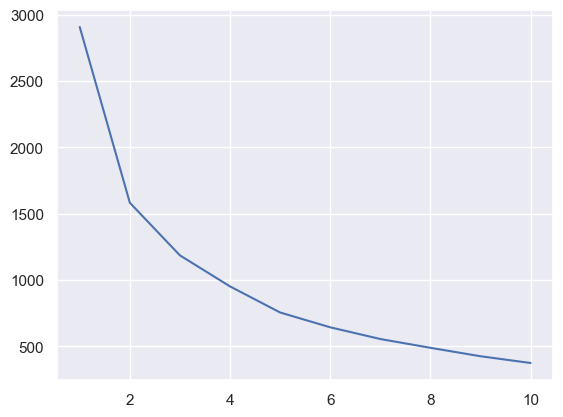

In [14]:
wcss = []
for i in range(1,11,1):
  model = KMeans(i).fit(bowler_for_clustering)
  wcss.append(model.inertia_)
plt.plot(np.arange(1,11,1),wcss)
plt.show()

In [15]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(bowler_for_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(bowler_for_clustering, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(bowler_for_clustering, cluster_labels)

   

For n_clusters = 2 The average silhouette_score is : 0.3847778870687438
For n_clusters = 3 The average silhouette_score is : 0.30514643929079266
For n_clusters = 4 The average silhouette_score is : 0.30722390551746787
For n_clusters = 5 The average silhouette_score is : 0.34302249429802245
For n_clusters = 6 The average silhouette_score is : 0.3110457976244157
For n_clusters = 7 The average silhouette_score is : 0.31847156499054086
For n_clusters = 8 The average silhouette_score is : 0.3353575432618858
For n_clusters = 9 The average silhouette_score is : 0.3090938370012622
For n_clusters = 10 The average silhouette_score is : 0.2973922006539069


In [16]:
kmodel =  KMeans(n_clusters=4)
ypred_kmeans = kmodel.fit_predict(bowler_for_clustering_scaled)

In [17]:
ypred_kmeans

array([3, 2, 3, 3, 1, 0, 0, 1, 3, 0, 3, 2, 2, 2, 1, 2, 0, 3, 3, 3, 0, 3,
       1, 3, 1, 3, 3, 3, 0, 0, 1, 3, 3, 2, 3, 1, 0, 2, 2, 2, 3, 1, 1, 1,
       3, 3, 2, 2, 3, 2, 3, 0, 0, 1, 1, 2, 0, 3, 1, 0, 2, 1, 3, 3, 1, 3,
       0, 3, 1, 1])

In [18]:
print('Silhouette score :',np.round(silhouette_score(bowler_for_clustering_scaled, ypred_kmeans),3))
print('Calinski-Harabasz Index :',np.round(metrics.calinski_harabasz_score(bowler_for_clustering_scaled, ypred_kmeans),3))
print(' Davies-Bouldin Index :',np.round(metrics.davies_bouldin_score(bowler_for_clustering_scaled, ypred_kmeans),3))

Silhouette score : 0.256
Calinski-Harabasz Index : 34.757
 Davies-Bouldin Index : 1.185


In [19]:
## 1 - good, 0 - Avg , 2 - poor

In [20]:
results = data_scaled
results['kmeans'] = ypred_kmeans

In [21]:
results

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
0,PP Chawla,CSK/KKR/KXIP/MI,0.572668,0.639946,0.565657,0.675764,0.445388,0.075188,0.527007,0.550021,3
1,DJ Bravo,CSK/GL/MI,0.723427,0.844429,0.424242,0.636415,0.631068,0.097744,0.743066,0.489826,2
2,B Kumar,PWI/SRH,0.538503,0.534647,0.700337,0.868119,0.473301,0.172932,0.489051,0.460788,3
3,SP Narine,KKR,0.638286,0.464674,0.979798,0.968689,0.474515,0.345865,0.389781,0.594037,3
4,R Ashwin,CSK/DC/KXIP/RPS/RR,0.398048,0.294837,0.848485,0.825404,0.275485,0.037594,0.345985,0.615798,1
...,...,...,...,...,...,...,...,...,...,...,...
65,PJ Sangwan,DC/GL/GT/KKR/MI,0.245662,0.472147,0.319865,0.693897,0.324029,0.000000,0.426277,0.353540,3
66,DE Bollinger,CSK,1.000000,0.944973,0.818182,0.786429,0.888350,0.278195,0.957664,0.626042,0
67,M Markande,MI/RR/SRH,0.448482,0.680707,0.249158,0.611272,0.439320,0.406015,0.315328,0.398191,3
68,MS Gony,CSK/DCH/GL/KXIP,0.129067,0.371603,0.319865,0.678848,0.246359,0.000000,0.332847,0.372898,1


In [22]:
results['kmeans'].value_counts()


kmeans
3    26
1    17
2    14
0    13
Name: count, dtype: int64

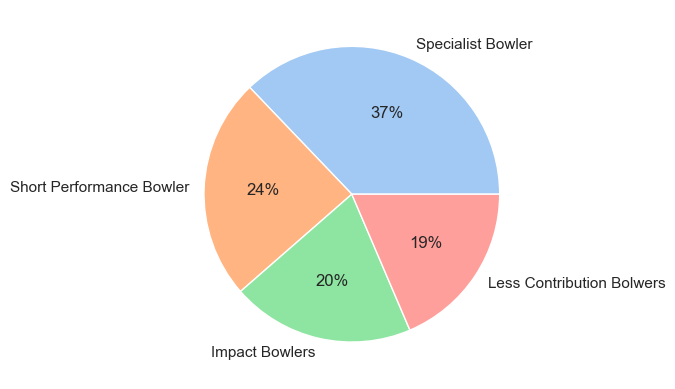

In [23]:
plt.pie(results['kmeans'].value_counts(), colors= sns.color_palette('pastel'), autopct='%.0f%%', labels = ['Specialist Bowler','Short Performance Bowler','Impact Bowlers','Less Contribution Bolwers'])
plt.show() 

In [24]:
columns = bowler_for_clustering_scaled.columns
columns

Index(['average', 'strike_rate', 'economy', 'balls_bolwed_per_innings',
       'wicket_index', 'big_impact_index', 'short_impact_index', 'runs_index'],
      dtype='object')

In [25]:
np.round(kmodel.cluster_centers_,3)

array([[0.812, 0.83 , 0.644, 0.863, 0.792, 0.395, 0.758, 0.423],
       [0.244, 0.316, 0.574, 0.547, 0.146, 0.05 , 0.179, 0.695],
       [0.557, 0.747, 0.308, 0.816, 0.654, 0.148, 0.736, 0.213],
       [0.502, 0.573, 0.554, 0.725, 0.423, 0.137, 0.46 , 0.501]])

In [26]:
cluster_center = pd.DataFrame(data=np.round(kmodel.cluster_centers_,3) , columns = columns, 
                              index=('Specialist Bowler','Short Perfromance Bowler','Less Contribution Bolwers','Impact Bowlers'))
cluster_center['No. of Bowlers'] = [13,17,14,26]

cols = cluster_center.columns.tolist()
cols = cols[-1:] + cols[:-1]


cluster_center = cluster_center [cols]
cluster_center

,No. of Bowlers,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
Specialist Bowler,13,0.812,0.830,0.644,0.863,0.792,0.395,0.758,0.423
Short Perfromance Bowler,17,0.244,0.316,0.574,0.547,0.146,0.050,0.179,0.695
Less Contribution Bolwers,14,0.557,0.747,0.308,0.816,0.654,0.148,0.736,0.213
Impact Bowlers,26,0.502,0.573,0.554,0.725,0.423,0.137,0.460,0.501


In [27]:
results[(results['kmeans']==0)].head(10)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
5,SL Malinga,MI,0.941974,0.872962,0.841751,0.958033,0.916262,0.428571,0.894891,0.490745,0
6,JJ Bumrah,MI,0.794469,0.745245,0.787879,0.936630,0.731796,0.225564,0.769343,0.466017,0
9,Rashid Khan,GT/SRH,0.831887,0.699049,0.949495,1.000000,0.719660,0.127820,0.835036,0.540625,0
16,K Rabada,DC/PBKS,0.824295,0.947011,0.390572,0.916534,1.000000,0.563910,0.940146,0.169775,0
20,CH Morris,CSK/DC/RCB/RR,0.705531,0.772418,0.552189,0.775400,0.649272,0.368421,0.602920,0.437685,0
28,CV Varun,KKR/KXIP,0.707158,0.702446,0.700337,0.910739,0.665049,0.218045,0.693431,0.418822,0
29,Imran Tahir,CSK/DC/RPS,0.889371,0.912364,0.632997,0.876063,0.912621,0.383459,0.929927,0.400170,0
36,MM Patel,GL/MI/RR,0.771150,0.758152,0.717172,0.799794,0.651699,0.360902,0.589781,0.535255,0
51,MA Starc,KKR/RCB,0.806399,0.895380,0.484848,0.781195,0.813107,0.383459,0.801460,0.379681,0
52,NM Coulter-Nile,DC/KKR/MI/RR,0.772777,0.789402,0.653199,0.895504,0.758495,0.398496,0.727007,0.394305,0


In [28]:
results[(results['kmeans']==1)].head(10)

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
4,R Ashwin,CSK/DC/KXIP/RPS/RR,0.398048,0.294837,0.848485,0.825404,0.275485,0.037594,0.345985,0.615798,1
7,RA Jadeja,CSK/GL/Kochi/RR,0.366594,0.376359,0.680135,0.488457,0.145631,0.142857,0.113869,0.810796,1
14,AR Patel,DC/KXIP,0.358460,0.290761,0.797980,0.748855,0.234223,0.052632,0.287591,0.645471,1
22,I Sharma,DC/DCH/KKR/KXIP/RPS/SRH,0.145879,0.297554,0.471380,0.752781,0.240291,0.067669,0.270073,0.402148,1
24,P Kumar,GL/KXIP/MI/RCB/SRH,0.056399,0.097147,0.646465,0.773717,0.143204,0.000000,0.208759,0.509326,1
30,IK Pathan,DC/GL/KXIP/RPS/SRH,0.219631,0.267663,0.629630,0.682026,0.186893,0.000000,0.261314,0.586407,1
35,KH Pandya,LSG/MI,0.156182,0.105299,0.767677,0.486401,0.014563,0.000000,0.054015,0.865762,1
41,KA Pollard,MI,0.302061,0.537364,0.286195,0.092345,0.008495,0.067669,0.000000,1.000000,1
42,SK Trivedi,RR,0.426790,0.428668,0.693603,0.669315,0.277913,0.097744,0.308029,0.645825,1
43,JH Kallis,KKR/RCB,0.102495,0.181386,0.589226,0.621086,0.111650,0.000000,0.170803,0.619189,1


In [29]:
results[(results['kmeans']==2)].head(10)

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
1,DJ Bravo,CSK/GL/MI,0.723427,0.844429,0.424242,0.636415,0.631068,0.097744,0.743066,0.489826,2
11,HV Patel,DC/PBKS/RCB,0.750542,0.915082,0.303030,0.753155,0.816748,0.218045,0.886131,0.279426,2
12,MM Sharma,CSK/DC/GT/KXIP,0.677874,0.843071,0.326599,0.688569,0.668689,0.270677,0.674453,0.367034,2
13,Mohammed Shami,DC/GT/KKR/KXIP/PBKS,0.558568,0.704484,0.407407,0.853164,0.627427,0.135338,0.713869,0.247986,2
15,TA Boult,DC/KKR/MI/RR/SRH,0.567787,0.690217,0.454545,0.912141,0.651699,0.075188,0.779562,0.223894,2
33,Arshdeep Singh,KXIP/PBKS,0.550976,0.783288,0.208754,0.752687,0.644417,0.345865,0.588321,0.209058,2
37,KK Ahmed,DC/SRH,0.637202,0.830842,0.269360,0.882232,0.800971,0.000000,1.000000,0.107955,2
38,Avesh Khan,DC/LSG/RCB/RR,0.568872,0.776495,0.259259,0.803253,0.674757,0.120301,0.781022,0.189982,2
39,MJ McClenaghan,MI,0.638286,0.783288,0.387205,0.917562,0.764563,0.135338,0.883212,0.164759,2
46,PJ Cummins,DC/KKR/SRH,0.360087,0.580163,0.303030,0.914852,0.543689,0.127820,0.616058,0.097004,2


In [30]:
results[(results['kmeans']==3)].head(10)

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
0,PP Chawla,CSK/KKR/KXIP/MI,0.572668,0.639946,0.565657,0.675764,0.445388,0.075188,0.527007,0.550021,3
2,B Kumar,PWI/SRH,0.538503,0.534647,0.700337,0.868119,0.473301,0.172932,0.489051,0.460788,3
3,SP Narine,KKR,0.638286,0.464674,0.979798,0.968689,0.474515,0.345865,0.389781,0.594037,3
8,Harbhajan Singh,CSK/KKR/MI,0.558568,0.455163,0.865320,0.787550,0.364078,0.090226,0.407299,0.659884,3
10,UT Yadav,DC/GT/KKR/RCB,0.389913,0.563179,0.387205,0.731283,0.415049,0.150376,0.443796,0.364632,3
17,AD Russell,DC/KKR,0.767896,1.000000,0.097643,0.207029,0.472087,0.203008,0.471533,0.770312,3
18,R Vinay Kumar,KKR/Kochi/MI/RCB,0.483731,0.629755,0.424242,0.698103,0.451456,0.075188,0.537226,0.424544,3
19,Z Khan,DC/MI/RCB,0.536334,0.537364,0.693603,0.868025,0.475728,0.075188,0.564964,0.454077,3
21,Mohammed Siraj,RCB/SRH,0.369848,0.572011,0.336700,0.759510,0.439320,0.165414,0.468613,0.295605,3
23,RP Singh,DCH/Kochi/MI/RCB/RPS,0.606833,0.662364,0.585859,0.813441,0.558252,0.180451,0.601460,0.425039,3


In [32]:
results = np.round(results,3)

In [33]:
def get_accuracy_metrics(y_pred,y_test):

  bal_acc = metrics.balanced_accuracy_score(y_test, y_pred)
  print ('The balanced accuracy on test data is %s' % (round(bal_acc,5)))

  f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
  print('F1 score micro :',round(f1_micro ,5))

  f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
  print('F1 score macro :',round(f1_macro ,5))

  f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
  print('F1 score weighted :',round(f1_weighted,5))

  recall = metrics.recall_score(y_test, y_pred, average='macro')
  print('Recall score :',recall)

  precision = metrics.precision_score(y_test, y_pred, average='macro')
  print('Precision score :',precision)

  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  print('Confusion Matrix :',confusion_matrix)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(results.drop('kmeans',axis=1), results['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)
X_test.drop(['name','team'],axis=1,inplace=True)

In [36]:
X_train

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
34,0.526,0.666,0.428,0.496,0.351,0.180,0.346,0.641
42,0.427,0.429,0.694,0.669,0.278,0.098,0.308,0.646
28,0.707,0.702,0.700,0.911,0.665,0.218,0.693,0.419
7,0.367,0.376,0.680,0.488,0.146,0.143,0.114,0.811
53,0.000,0.000,0.700,0.679,0.058,0.000,0.107,0.639
...,...,...,...,...,...,...,...,...
23,0.607,0.662,0.586,0.813,0.558,0.180,0.601,0.425
20,0.706,0.772,0.552,0.775,0.649,0.368,0.603,0.438
60,0.411,0.752,0.000,0.794,0.642,0.211,0.691,0.000
14,0.358,0.291,0.798,0.749,0.234,0.053,0.288,0.645


In [37]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred_rfc = rfc.predict(X_test)

In [38]:
fi_ovr = np.round(rfc.feature_importances_.tolist(),3)
dict_ovr = dict(zip(columns,np.array(fi_ovr)))
dict_ovr

{'average': 0.147,
 'strike_rate': 0.125,
 'economy': 0.07,
 'balls_bolwed_per_innings': 0.021,
 'wicket_index': 0.219,
 'big_impact_index': 0.065,
 'short_impact_index': 0.222,
 'runs_index': 0.131}

In [40]:
get_accuracy_metrics(ypred_rfc,y_test)

The balanced accuracy on test data is 0.9375
F1 score micro : 0.95238
F1 score macro : 0.92857
F1 score weighted : 0.95238
Recall score : 0.9375
Precision score : 0.9375
Confusion Matrix : [[3 0 0 0]
 [0 6 0 0]
 [1 0 3 0]
 [0 0 0 8]]


In [41]:
final_index = results.copy()

In [42]:
final_index['rfc_score'] = 0
for i in columns:
  final_index['rfc_score'] = np.round(final_index['rfc_score'] + (final_index[i] * dict_ovr.get(i)),3)   

In [44]:
final_index.sort_values('rfc_score',ascending = False).head(10)

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0,0.846
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,0,0.818
29,Imran Tahir,CSK/DC/RPS,0.889,0.912,0.633,0.876,0.913,0.383,0.930,0.400,0,0.790
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,0,0.772
9,Rashid Khan,GT/SRH,0.832,0.699,0.949,1.000,0.720,0.128,0.835,0.541,0,0.718
51,MA Starc,KKR/RCB,0.806,0.895,0.485,0.781,0.813,0.383,0.801,0.380,0,0.711
6,JJ Bumrah,MI,0.794,0.745,0.788,0.937,0.732,0.226,0.769,0.466,0,0.692
11,HV Patel,DC/PBKS/RCB,0.751,0.915,0.303,0.753,0.817,0.218,0.886,0.279,2,0.688
52,NM Coulter-Nile,DC/KKR/MI/RR,0.773,0.789,0.653,0.896,0.758,0.398,0.727,0.394,0,0.683
59,AJ Tye,GL/KXIP/LSG/RR,0.752,0.896,0.357,0.924,0.925,1.000,0.509,0.134,0,0.666


In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
ypred_knn = knn.predict(X_test)

In [46]:
get_accuracy_metrics(ypred_knn,y_test)

The balanced accuracy on test data is 0.95833
F1 score micro : 0.95238
F1 score macro : 0.96257
F1 score weighted : 0.95162
Recall score : 0.9583333333333334
Precision score : 0.9722222222222222
Confusion Matrix : [[3 0 0 0]
 [0 5 0 1]
 [0 0 4 0]
 [0 0 0 8]]


In [47]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
ypred_xgb = xgb.predict(X_test)

In [48]:
get_accuracy_metrics(ypred_xgb,y_test)


The balanced accuracy on test data is 0.79167
F1 score micro : 0.80952
F1 score macro : 0.78274
F1 score weighted : 0.80952
Recall score : 0.7916666666666666
Precision score : 0.7916666666666666
Confusion Matrix : [[2 0 1 0]
 [0 6 0 0]
 [1 0 3 0]
 [0 2 0 6]]


In [49]:
importance = np.round(xgb.feature_importances_,3)
dict_xgb = dict(zip(columns,importance))
dict_xgb

{'average': 0.07,
 'strike_rate': 0.004,
 'economy': 0.051,
 'balls_bolwed_per_innings': 0.068,
 'wicket_index': 0.325,
 'big_impact_index': 0.19,
 'short_impact_index': 0.043,
 'runs_index': 0.25}

In [50]:
final_index['xgb_score'] = 0
for i in columns:
  final_index['xgb_score'] = np.round(final_index['xgb_score'] + (final_index[i] * dict_xgb.get(i)),3)   


In [51]:
final_index.sort_values('xgb_score',ascending = False).head(10).drop(['rfc_score'],axis=1)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,xgb_score
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,0,0.718
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0,0.708
59,AJ Tye,GL/KXIP/LSG/RR,0.752,0.896,0.357,0.924,0.925,1.000,0.509,0.134,0,0.684
29,Imran Tahir,CSK/DC/RPS,0.889,0.912,0.633,0.876,0.913,0.383,0.930,0.400,0,0.668
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,0,0.658
9,Rashid Khan,GT/SRH,0.832,0.699,0.949,1.000,0.720,0.128,0.835,0.541,0,0.606
51,MA Starc,KKR/RCB,0.806,0.895,0.485,0.781,0.813,0.383,0.801,0.380,0,0.604
52,NM Coulter-Nile,DC/KKR/MI/RR,0.773,0.789,0.653,0.896,0.758,0.398,0.727,0.394,0,0.602
6,JJ Bumrah,MI,0.794,0.745,0.788,0.937,0.732,0.226,0.769,0.466,0,0.594
36,MM Patel,GL/MI/RR,0.771,0.758,0.717,0.800,0.652,0.361,0.590,0.535,0,0.588


In [52]:
xgb = XGBClassifier()
dtree = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [53]:
voting = VotingClassifier(
    estimators=[('random_forest', rfc), ('xg_boost', xgb), ('decision_tree', dtree)],
    voting='hard')

In [54]:
voting.fit(X_train, y_train)


VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('xg_boost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42))])

In [55]:
for clf in (rfc,dtree,xgb,voting):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.9523809523809523
DecisionTreeClassifier 0.8571428571428571
XGBClassifier 0.8095238095238095
VotingClassifier 0.9047619047619048


In [56]:
ypred_voting = voting.predict(X_test)


In [57]:
get_accuracy_metrics(ypred_voting,y_test)


The balanced accuracy on test data is 0.90625
F1 score micro : 0.90476
F1 score macro : 0.89267
F1 score weighted : 0.90501
Recall score : 0.90625
Precision score : 0.9017857142857143
Confusion Matrix : [[3 0 0 0]
 [0 6 0 0]
 [1 0 3 0]
 [0 1 0 7]]


In [58]:
def compute_feature_importance(voting, weights):

    feature_importance = dict()
    for est in voting.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    ## print(feature_importance.values())

    fe_scores = [0]*len(list(feature_importance.values())[0])

    ## print(fe_scores)
    for idx, imp_score in enumerate(feature_importance.values()):
        ## print(imp_score)
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [59]:
dict_voting = dict(zip(columns,np.round(compute_feature_importance(voting, [1/3,1/3,1/3]),3)))
dict_voting

{'average': 0.073,
 'strike_rate': 0.049,
 'economy': 0.064,
 'balls_bolwed_per_innings': 0.036,
 'wicket_index': 0.392,
 'big_impact_index': 0.159,
 'short_impact_index': 0.069,
 'runs_index': 0.158}

In [60]:
final_index['voting_score'] = 0
for i in columns:
  final_index['voting_score'] = np.round(final_index['voting_score'] + (final_index[i] * dict_voting.get(i)),3)

In [61]:
final_index.sort_values('voting_score',ascending = False).head(10).drop(['rfc_score','xgb_score'],axis=1)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,voting_score
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,0,0.767
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0,0.756
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,0,0.738
59,AJ Tye,GL/KXIP/LSG/RR,0.752,0.896,0.357,0.924,0.925,1.000,0.509,0.134,0,0.733
29,Imran Tahir,CSK/DC/RPS,0.889,0.912,0.633,0.876,0.913,0.383,0.930,0.400,0,0.729
51,MA Starc,KKR/RCB,0.806,0.895,0.485,0.781,0.813,0.383,0.801,0.380,0,0.657
52,NM Coulter-Nile,DC/KKR/MI/RR,0.773,0.789,0.653,0.896,0.758,0.398,0.727,0.394,0,0.641
9,Rashid Khan,GT/SRH,0.832,0.699,0.949,1.000,0.720,0.128,0.835,0.541,0,0.637
6,JJ Bumrah,MI,0.794,0.745,0.788,0.937,0.732,0.226,0.769,0.466,0,0.629
36,MM Patel,GL/MI/RR,0.771,0.758,0.717,0.800,0.652,0.361,0.590,0.535,0,0.607


In [62]:
middle_ovr = pd.DataFrame()

In [64]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:0,0:1})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)

In [66]:
rfc_0 = RandomForestClassifier()
rfc_0.fit(X_train, y_train)
ypred_rfc_0 = rfc.predict(X_test.drop(['name','team'],axis=1))
fi_0 = np.round(rfc_0.feature_importances_,3)
dict_0 = dict(zip(columns,fi_0))
dict_0

{'average': 0.246,
 'strike_rate': 0.146,
 'economy': 0.067,
 'balls_bolwed_per_innings': 0.039,
 'wicket_index': 0.138,
 'big_impact_index': 0.259,
 'short_impact_index': 0.064,
 'runs_index': 0.041}

In [67]:
results_new[results_new.kmeans == 1]

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,1
6,JJ Bumrah,MI,0.794,0.745,0.788,0.937,0.732,0.226,0.769,0.466,1
9,Rashid Khan,GT/SRH,0.832,0.699,0.949,1.000,0.720,0.128,0.835,0.541,1
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,1
20,CH Morris,CSK/DC/RCB/RR,0.706,0.772,0.552,0.775,0.649,0.368,0.603,0.438,1
28,CV Varun,KKR/KXIP,0.707,0.702,0.700,0.911,0.665,0.218,0.693,0.419,1
29,Imran Tahir,CSK/DC/RPS,0.889,0.912,0.633,0.876,0.913,0.383,0.930,0.400,1
36,MM Patel,GL/MI/RR,0.771,0.758,0.717,0.800,0.652,0.361,0.590,0.535,1
51,MA Starc,KKR/RCB,0.806,0.895,0.485,0.781,0.813,0.383,0.801,0.380,1
52,NM Coulter-Nile,DC/KKR/MI/RR,0.773,0.789,0.653,0.896,0.758,0.398,0.727,0.394,1


In [68]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_0.get(i)),3)

In [69]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,rbml_score
59,AJ Tye,GL/KXIP/LSG/RR,0.752,0.896,0.357,0.924,0.925,1.000,0.509,0.134,0.801
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,0.766
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,0.754
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0.752
29,Imran Tahir,CSK/DC/RPS,0.889,0.912,0.633,0.876,0.913,0.383,0.930,0.400,0.729
51,MA Starc,KKR/RCB,0.806,0.895,0.485,0.781,0.813,0.383,0.801,0.380,0.669
52,NM Coulter-Nile,DC/KKR/MI/RR,0.773,0.789,0.653,0.896,0.758,0.398,0.727,0.394,0.655
56,S Aravind,RCB,0.764,0.855,0.485,0.658,0.663,0.398,0.606,0.508,0.625
36,MM Patel,GL/MI/RR,0.771,0.758,0.717,0.800,0.652,0.361,0.590,0.535,0.623
6,JJ Bumrah,MI,0.794,0.745,0.788,0.937,0.732,0.226,0.769,0.466,0.622


In [70]:
middle_ovr = results_new[results_new.kmeans == 1].copy()


In [73]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:1,2:0,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)

In [74]:
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train, y_train)
ypred_rfc_1 = rfc.predict(X_test.drop(['name','team'],axis=1))
fi_1 = np.round(rfc_1.feature_importances_,3)
dict_1 = dict(zip(columns,fi_1))
dict_1

{'average': 0.106,
 'strike_rate': 0.123,
 'economy': 0.003,
 'balls_bolwed_per_innings': 0.028,
 'wicket_index': 0.299,
 'big_impact_index': 0.043,
 'short_impact_index': 0.317,
 'runs_index': 0.082}

In [75]:
results_new[results_new.kmeans == 1]


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
4,R Ashwin,CSK/DC/KXIP/RPS/RR,0.398,0.295,0.848,0.825,0.275,0.038,0.346,0.616,1
7,RA Jadeja,CSK/GL/Kochi/RR,0.367,0.376,0.680,0.488,0.146,0.143,0.114,0.811,1
14,AR Patel,DC/KXIP,0.358,0.291,0.798,0.749,0.234,0.053,0.288,0.645,1
22,I Sharma,DC/DCH/KKR/KXIP/RPS/SRH,0.146,0.298,0.471,0.753,0.240,0.068,0.270,0.402,1
24,P Kumar,GL/KXIP/MI/RCB/SRH,0.056,0.097,0.646,0.774,0.143,0.000,0.209,0.509,1
...,...,...,...,...,...,...,...,...,...,...,...
58,MP Stoinis,DC/KXIP/LSG/RCB,0.409,0.734,0.044,0.000,0.068,0.120,0.038,0.988,1
61,MC Henriques,DC/KKR/PBKS/RCB/SRH,0.351,0.466,0.505,0.271,0.075,0.000,0.127,0.922,1
64,DT Christian,DC/DCH/RCB/RPS,0.315,0.424,0.522,0.476,0.167,0.000,0.238,0.721,1
68,MS Gony,CSK/DCH/GL/KXIP,0.129,0.372,0.320,0.679,0.246,0.000,0.333,0.373,1


In [76]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_1.get(i)),3)

In [77]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,rbml_score
42,SK Trivedi,RR,0.427,0.429,0.694,0.669,0.278,0.098,0.308,0.646,0.357
4,R Ashwin,CSK/DC/KXIP/RPS/RR,0.398,0.295,0.848,0.825,0.275,0.038,0.346,0.616,0.349
14,AR Patel,DC/KXIP,0.358,0.291,0.798,0.749,0.234,0.053,0.288,0.645,0.313
68,MS Gony,CSK/DCH/GL/KXIP,0.129,0.372,0.320,0.679,0.246,0.000,0.333,0.373,0.291
64,DT Christian,DC/DCH/RCB/RPS,0.315,0.424,0.522,0.476,0.167,0.000,0.238,0.721,0.284
54,SB Jakati,CSK/GL/RCB,0.341,0.434,0.545,0.568,0.227,0.263,0.140,0.641,0.283
22,I Sharma,DC/DCH/KKR/KXIP/RPS/SRH,0.146,0.298,0.471,0.753,0.240,0.068,0.270,0.402,0.268
30,IK Pathan,DC/GL/KXIP/RPS/SRH,0.220,0.268,0.630,0.682,0.187,0.000,0.261,0.586,0.264
7,RA Jadeja,CSK/GL/Kochi/RR,0.367,0.376,0.680,0.488,0.146,0.143,0.114,0.811,0.254
58,MP Stoinis,DC/KXIP/LSG/RCB,0.409,0.734,0.044,0.000,0.068,0.120,0.038,0.988,0.251


In [78]:
middle_ovr = pd.concat([middle_ovr, results_new[results_new.kmeans == 1]])


In [80]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:1,3:0,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)

In [82]:
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train, y_train)
ypred_rfc_2 = rfc.predict(X_test.drop(['name','team'],axis=1))
fi_2 = np.round(rfc_2.feature_importances_,3)
dict_2 = dict(zip(columns,fi_2))
dict_2

{'average': 0.074,
 'strike_rate': 0.055,
 'economy': 0.176,
 'balls_bolwed_per_innings': 0.054,
 'wicket_index': 0.101,
 'big_impact_index': 0.086,
 'short_impact_index': 0.127,
 'runs_index': 0.328}

In [83]:
results_new[results_new.kmeans == 1]

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
1,DJ Bravo,CSK/GL/MI,0.723,0.844,0.424,0.636,0.631,0.098,0.743,0.490,1
11,HV Patel,DC/PBKS/RCB,0.751,0.915,0.303,0.753,0.817,0.218,0.886,0.279,1
12,MM Sharma,CSK/DC/GT/KXIP,0.678,0.843,0.327,0.689,0.669,0.271,0.674,0.367,1
13,Mohammed Shami,DC/GT/KKR/KXIP/PBKS,0.559,0.704,0.407,0.853,0.627,0.135,0.714,0.248,1
15,TA Boult,DC/KKR/MI/RR/SRH,0.568,0.690,0.455,0.912,0.652,0.075,0.780,0.224,1
33,Arshdeep Singh,KXIP/PBKS,0.551,0.783,0.209,0.753,0.644,0.346,0.588,0.209,1
37,KK Ahmed,DC/SRH,0.637,0.831,0.269,0.882,0.801,0.000,1.000,0.108,1
38,Avesh Khan,DC/LSG/RCB/RR,0.569,0.776,0.259,0.803,0.675,0.120,0.781,0.190,1
39,MJ McClenaghan,MI,0.638,0.783,0.387,0.918,0.765,0.135,0.883,0.165,1
46,PJ Cummins,DC/KKR/SRH,0.360,0.580,0.303,0.915,0.544,0.128,0.616,0.097,1


In [84]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_2.get(i)),3)

In [85]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,rbml_score
1,DJ Bravo,CSK/GL/MI,0.723,0.844,0.424,0.636,0.631,0.098,0.743,0.490,0.536
11,HV Patel,DC/PBKS/RCB,0.751,0.915,0.303,0.753,0.817,0.218,0.886,0.279,0.507
12,MM Sharma,CSK/DC/GT/KXIP,0.678,0.843,0.327,0.689,0.669,0.271,0.674,0.367,0.488
39,MJ McClenaghan,MI,0.638,0.783,0.387,0.918,0.765,0.135,0.883,0.165,0.463
15,TA Boult,DC/KKR/MI/RR/SRH,0.568,0.690,0.455,0.912,0.652,0.075,0.780,0.224,0.453
13,Mohammed Shami,DC/GT/KKR/KXIP/PBKS,0.559,0.704,0.407,0.853,0.627,0.135,0.714,0.248,0.445
37,KK Ahmed,DC/SRH,0.637,0.831,0.269,0.882,0.801,0.000,1.000,0.108,0.431
47,MG Johnson,KKR/KXIP/MI,0.502,0.630,0.458,0.924,0.597,0.000,0.755,0.213,0.429
38,Avesh Khan,DC/LSG/RCB/RR,0.569,0.776,0.259,0.803,0.675,0.120,0.781,0.190,0.413
33,Arshdeep Singh,KXIP/PBKS,0.551,0.783,0.209,0.753,0.644,0.346,0.588,0.209,0.401


In [86]:
middle_ovr = pd.concat([middle_ovr, results_new[results_new.kmeans == 1]])


In [88]:
results_new = results.copy()
results_new['kmeans'] = results_new.kmeans.map({1:0,2:0,3:1,0:0})
X_train, X_test, y_train, y_test = train_test_split(results_new.drop('kmeans',axis=1), results_new['kmeans'], test_size=0.3, random_state=42)
X_train.drop(['name','team'],axis=1,inplace=True)

In [90]:
rfc_3 = RandomForestClassifier()
rfc_3.fit(X_train, y_train)
ypred_rfc_3 = rfc.predict(X_test.drop(['name','team'],axis=1))
fi_3 = np.round(rfc_3.feature_importances_,3)
dict_3 = dict(zip(columns,fi_3))
dict_3

{'average': 0.157,
 'strike_rate': 0.142,
 'economy': 0.041,
 'balls_bolwed_per_innings': 0.047,
 'wicket_index': 0.242,
 'big_impact_index': 0.039,
 'short_impact_index': 0.228,
 'runs_index': 0.105}

In [91]:
results_new[results_new.kmeans == 1]


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans
0,PP Chawla,CSK/KKR/KXIP/MI,0.573,0.640,0.566,0.676,0.445,0.075,0.527,0.550,1
2,B Kumar,PWI/SRH,0.539,0.535,0.700,0.868,0.473,0.173,0.489,0.461,1
3,SP Narine,KKR,0.638,0.465,0.980,0.969,0.475,0.346,0.390,0.594,1
8,Harbhajan Singh,CSK/KKR/MI,0.559,0.455,0.865,0.788,0.364,0.090,0.407,0.660,1
10,UT Yadav,DC/GT/KKR/RCB,0.390,0.563,0.387,0.731,0.415,0.150,0.444,0.365,1
...,...,...,...,...,...,...,...,...,...,...,...
57,VR Aaron,DC/GT/KXIP/RCB/RR,0.190,0.467,0.239,0.648,0.294,0.000,0.390,0.347,1
62,R Sharma,DC/DCH/PWI,0.543,0.426,0.882,0.760,0.329,0.000,0.432,0.696,1
63,S Sreesanth,Kochi/KXIP/RR,0.402,0.507,0.515,0.658,0.329,0.000,0.432,0.529,1
65,PJ Sangwan,DC/GL/GT/KKR/MI,0.246,0.472,0.320,0.694,0.324,0.000,0.426,0.354,1


In [92]:
results_new['rbml_score'] = 0
for i in columns:
  results_new['rbml_score'] = np.round(results_new['rbml_score'] + (results_new[i] * dict_3.get(i)),3)

In [93]:
results_new[results_new.kmeans == 1].sort_values('rbml_score',ascending=False).head(10).drop(['kmeans'],axis=1)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,rbml_score
17,AD Russell,DC/KKR,0.768,1.000,0.098,0.207,0.472,0.203,0.472,0.770,0.588
23,RP Singh,DCH/Kochi/MI/RCB/RPS,0.607,0.662,0.586,0.813,0.558,0.180,0.601,0.425,0.575
48,SK Warne,RR,0.639,0.579,0.798,0.859,0.507,0.143,0.565,0.546,0.570
31,M Morkel,DC/KKR/RR,0.544,0.565,0.657,0.966,0.561,0.105,0.650,0.331,0.560
50,S Gopal,MI/RR/SRH,0.608,0.708,0.498,0.608,0.464,0.150,0.507,0.571,0.539
3,SP Narine,KKR,0.638,0.465,0.980,0.969,0.475,0.346,0.390,0.594,0.531
0,PP Chawla,CSK/KKR/KXIP/MI,0.573,0.640,0.566,0.676,0.445,0.075,0.527,0.550,0.525
19,Z Khan,DC/MI/RCB,0.536,0.537,0.694,0.868,0.476,0.075,0.565,0.454,0.524
2,B Kumar,PWI/SRH,0.539,0.535,0.700,0.868,0.473,0.173,0.489,0.461,0.511
25,Kuldeep Yadav,DC/KKR,0.527,0.639,0.485,0.783,0.513,0.368,0.434,0.382,0.508


In [94]:
middle_ovr = pd.concat([middle_ovr, results_new[results_new.kmeans == 1]])


In [95]:
middle_ovr

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,1,0.766
6,JJ Bumrah,MI,0.794,0.745,0.788,0.937,0.732,0.226,0.769,0.466,1,0.622
9,Rashid Khan,GT/SRH,0.832,0.699,0.949,1.000,0.720,0.128,0.835,0.541,1,0.617
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,1,0.754
20,CH Morris,CSK/DC/RCB/RR,0.706,0.772,0.552,0.775,0.649,0.368,0.603,0.438,1,0.596
...,...,...,...,...,...,...,...,...,...,...,...,...
57,VR Aaron,DC/GT/KXIP/RCB/RR,0.190,0.467,0.239,0.648,0.294,0.000,0.390,0.347,1,0.332
62,R Sharma,DC/DCH/PWI,0.543,0.426,0.882,0.760,0.329,0.000,0.432,0.696,1,0.468
63,S Sreesanth,Kochi/KXIP/RR,0.402,0.507,0.515,0.658,0.329,0.000,0.432,0.529,1,0.421
65,PJ Sangwan,DC/GL/GT/KKR/MI,0.246,0.472,0.320,0.694,0.324,0.000,0.426,0.354,1,0.364


In [96]:
final_index = pd.merge(final_index,middle_ovr[['name','team','rbml_score']],on=['name','team'],how='left')


In [97]:
final_index.sort_values('rbml_score',ascending = False).head(10).drop(['rfc_score','xgb_score','voting_score'],axis=1)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score
59,AJ Tye,GL/KXIP/LSG/RR,0.752,0.896,0.357,0.924,0.925,1.000,0.509,0.134,0,0.801
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,0,0.766
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,0,0.754
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0,0.752
29,Imran Tahir,CSK/DC/RPS,0.889,0.912,0.633,0.876,0.913,0.383,0.930,0.400,0,0.729
51,MA Starc,KKR/RCB,0.806,0.895,0.485,0.781,0.813,0.383,0.801,0.380,0,0.669
52,NM Coulter-Nile,DC/KKR/MI/RR,0.773,0.789,0.653,0.896,0.758,0.398,0.727,0.394,0,0.655
56,S Aravind,RCB,0.764,0.855,0.485,0.658,0.663,0.398,0.606,0.508,0,0.625
36,MM Patel,GL/MI/RR,0.771,0.758,0.717,0.800,0.652,0.361,0.590,0.535,0,0.623
6,JJ Bumrah,MI,0.794,0.745,0.788,0.937,0.732,0.226,0.769,0.466,0,0.622


In [98]:
final_index


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
0,PP Chawla,CSK/KKR/KXIP/MI,0.573,0.640,0.566,0.676,0.445,0.075,0.527,0.550,3,0.509,0.438,0.442,0.525
1,DJ Bravo,CSK/GL/MI,0.723,0.844,0.424,0.636,0.631,0.098,0.743,0.490,2,0.628,0.498,0.535,0.536
2,B Kumar,PWI/SRH,0.539,0.535,0.700,0.868,0.473,0.173,0.489,0.461,3,0.497,0.458,0.461,0.511
3,SP Narine,KKR,0.638,0.465,0.980,0.969,0.475,0.346,0.390,0.594,3,0.532,0.548,0.530,0.531
4,R Ashwin,CSK/DC/KXIP/RPS/RR,0.398,0.295,0.848,0.825,0.275,0.038,0.346,0.616,1,0.392,0.393,0.362,0.349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,PJ Sangwan,DC/GL/GT/KKR/MI,0.246,0.472,0.320,0.694,0.324,0.000,0.426,0.354,3,0.344,0.294,0.298,0.364
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0,0.846,0.708,0.756,0.752
67,M Markande,MI/RR/SRH,0.448,0.681,0.249,0.611,0.439,0.406,0.315,0.398,3,0.425,0.422,0.426,0.442
68,MS Gony,CSK/DCH/GL/KXIP,0.129,0.372,0.320,0.679,0.246,0.000,0.333,0.373,1,0.279,0.259,0.249,0.291


In [99]:
final_index.sort_values('rbml_score',ascending = False).head(10)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
59,AJ Tye,GL/KXIP/LSG/RR,0.752,0.896,0.357,0.924,0.925,1.000,0.509,0.134,0,0.666,0.684,0.733,0.801
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,0,0.818,0.718,0.767,0.766
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,0,0.772,0.658,0.738,0.754
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0,0.846,0.708,0.756,0.752
29,Imran Tahir,CSK/DC/RPS,0.889,0.912,0.633,0.876,0.913,0.383,0.930,0.400,0,0.790,0.668,0.729,0.729
51,MA Starc,KKR/RCB,0.806,0.895,0.485,0.781,0.813,0.383,0.801,0.380,0,0.711,0.604,0.657,0.669
52,NM Coulter-Nile,DC/KKR/MI/RR,0.773,0.789,0.653,0.896,0.758,0.398,0.727,0.394,0,0.683,0.602,0.641,0.655
56,S Aravind,RCB,0.764,0.855,0.485,0.658,0.663,0.398,0.606,0.508,0,0.640,0.570,0.598,0.625
36,MM Patel,GL/MI/RR,0.771,0.758,0.717,0.800,0.652,0.361,0.590,0.535,0,0.642,0.588,0.607,0.623
6,JJ Bumrah,MI,0.794,0.745,0.788,0.937,0.732,0.226,0.769,0.466,0,0.692,0.594,0.629,0.622


In [100]:
final_index.sort_values('voting_score',ascending = False).head(10)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,0,0.818,0.718,0.767,0.766
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0,0.846,0.708,0.756,0.752
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,0,0.772,0.658,0.738,0.754
59,AJ Tye,GL/KXIP/LSG/RR,0.752,0.896,0.357,0.924,0.925,1.000,0.509,0.134,0,0.666,0.684,0.733,0.801
29,Imran Tahir,CSK/DC/RPS,0.889,0.912,0.633,0.876,0.913,0.383,0.930,0.400,0,0.790,0.668,0.729,0.729
51,MA Starc,KKR/RCB,0.806,0.895,0.485,0.781,0.813,0.383,0.801,0.380,0,0.711,0.604,0.657,0.669
52,NM Coulter-Nile,DC/KKR/MI/RR,0.773,0.789,0.653,0.896,0.758,0.398,0.727,0.394,0,0.683,0.602,0.641,0.655
9,Rashid Khan,GT/SRH,0.832,0.699,0.949,1.000,0.720,0.128,0.835,0.541,0,0.718,0.606,0.637,0.617
6,JJ Bumrah,MI,0.794,0.745,0.788,0.937,0.732,0.226,0.769,0.466,0,0.692,0.594,0.629,0.622
36,MM Patel,GL/MI/RR,0.771,0.758,0.717,0.800,0.652,0.361,0.590,0.535,0,0.642,0.588,0.607,0.623


(70, 8)
(70, 2)


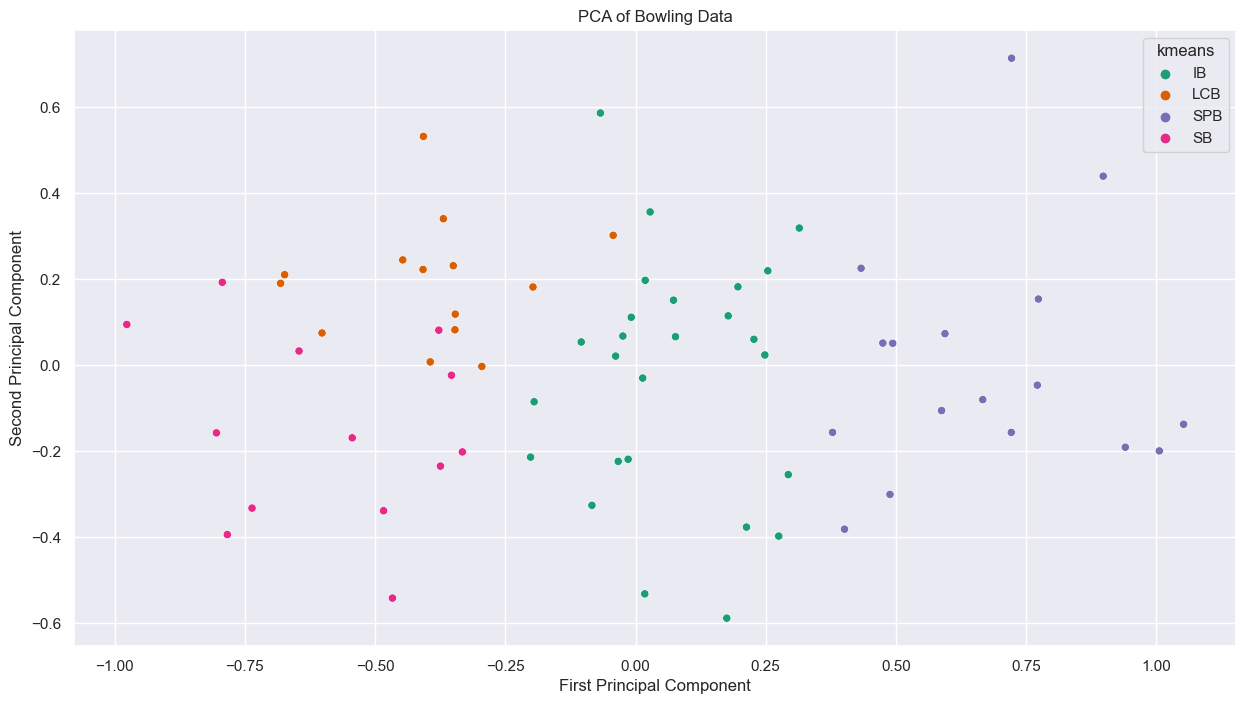

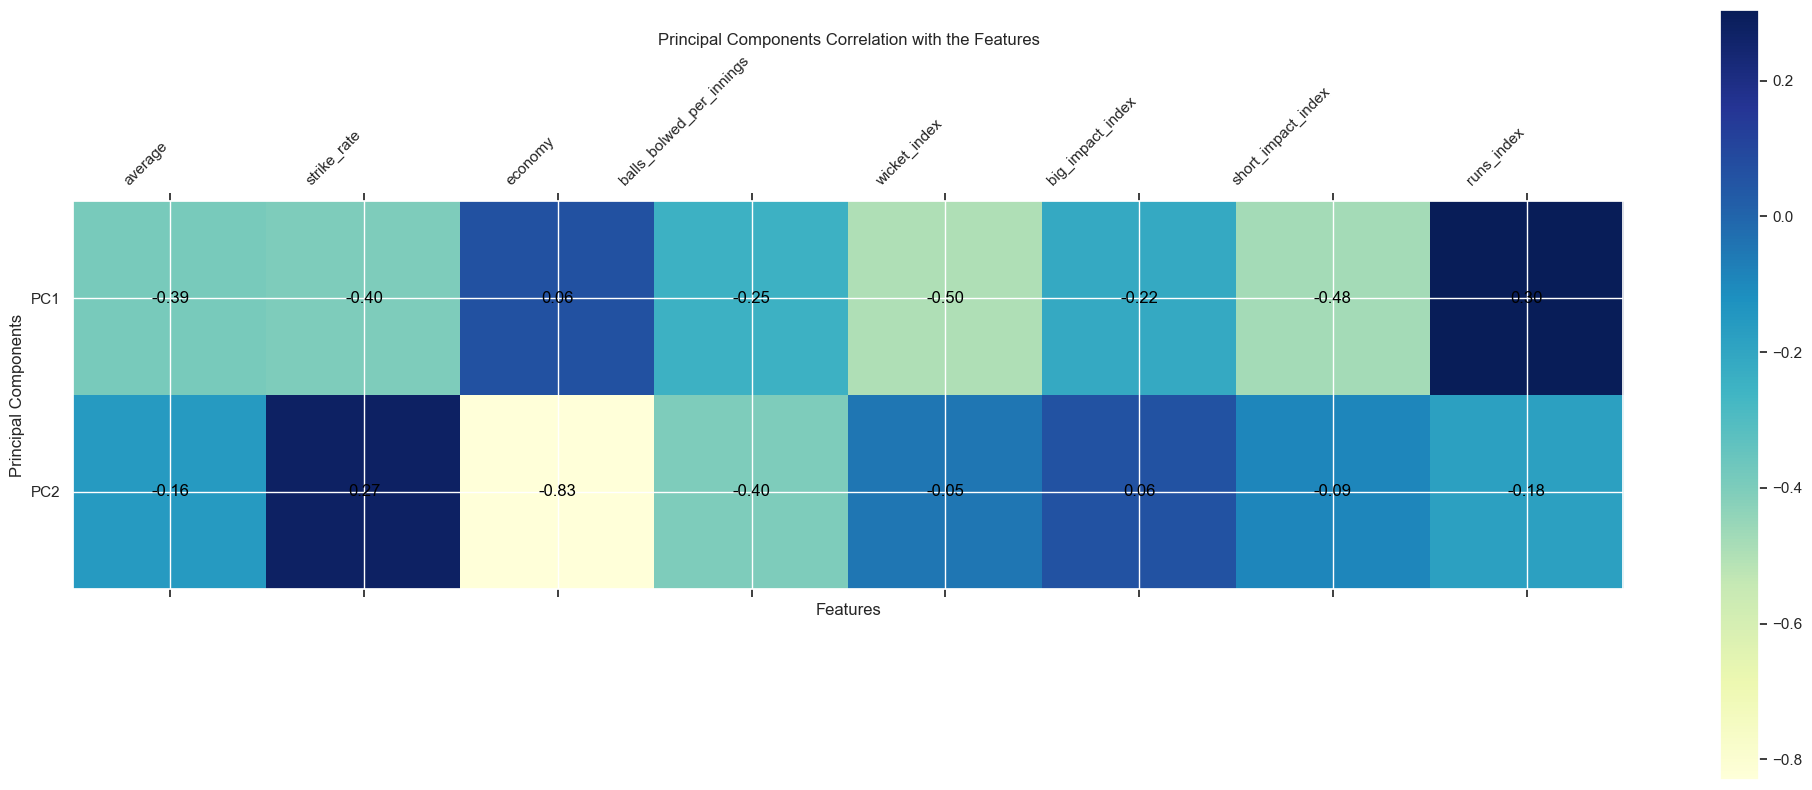

Selected features shape: (70, 8)
Selected features support: [ True  True  True  True  True  True  True  True]


In [102]:
pca = PCA(n_components=2)
pca.fit(bowler_for_clustering_scaled)
x_pca = pca.transform(bowler_for_clustering_scaled)

# Print shapes
print(bowler_for_clustering_scaled.shape)
print(x_pca.shape)

# Scatter plot using seaborn
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=results['kmeans'].map({0:'SB', 1:'SPB', 2:'LCB', 3:'IB'}), palette='Dark2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Bowling Data')
plt.show()

# Creating a DataFrame for PCA components
columns = bowler_for_clustering_scaled.columns  # Assuming you have the columns list
df = pd.DataFrame(pca.components_, columns=columns)

# Heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(25, 10))
cax = ax.matshow(df, cmap='YlGnBu')
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=45, ha='right')
ax.set_yticklabels(['PC1', 'PC2'])  # Naming principal components

# Annotate heatmap with PCA component values
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, format(df.iloc[i, j], ".2f"),
                       ha='center', va='center', color='black')

# Add title and labels
plt.title('Principal Components Correlation with the Features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

# Display the heatmap
plt.show()

# Feature selection with VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
selected_features = selector.fit_transform(bowler_for_clustering_scaled)

print("Selected features shape:", selected_features.shape)
print("Selected features support:", selector.get_support())

In [103]:
pca.explained_variance_


array([0.24283876, 0.07049825])

In [104]:
pca.explained_variance_ratio_


array([0.62277012, 0.1807957 ])

In [105]:
dict_pca = dict(zip(columns,np.round(pca.components_[0],3)))
dict_pca

{'average': -0.388,
 'strike_rate': -0.403,
 'economy': 0.063,
 'balls_bolwed_per_innings': -0.249,
 'wicket_index': -0.502,
 'big_impact_index': -0.218,
 'short_impact_index': -0.48,
 'runs_index': 0.304}

In [106]:
final_index['pca_score'] = 0
for i in columns:
  final_index['pca_score'] = np.round(final_index['pca_score'] + (final_index[i] * dict_pca.get(i)),3)

In [107]:
final_index.sort_values('pca_score').head(10).drop(['rfc_score','xgb_score','voting_score','rbml_score'],axis=1)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,pca_score
16,K Rabada,DC/PBKS,0.824,0.947,0.391,0.917,1.000,0.564,0.940,0.170,0,-1.929
29,Imran Tahir,CSK/DC/RPS,0.889,0.912,0.633,0.876,0.913,0.383,0.930,0.400,0,-1.756
59,AJ Tye,GL/KXIP/LSG/RR,0.752,0.896,0.357,0.924,0.925,1.000,0.509,0.134,0,-1.746
5,SL Malinga,MI,0.942,0.873,0.842,0.958,0.916,0.429,0.895,0.491,0,-1.738
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0,-1.690
37,KK Ahmed,DC/SRH,0.637,0.831,0.269,0.882,0.801,0.000,1.000,0.108,2,-1.634
11,HV Patel,DC/PBKS/RCB,0.751,0.915,0.303,0.753,0.817,0.218,0.886,0.279,2,-1.626
51,MA Starc,KKR/RCB,0.806,0.895,0.485,0.781,0.813,0.383,0.801,0.380,0,-1.596
39,MJ McClenaghan,MI,0.638,0.783,0.387,0.918,0.765,0.135,0.883,0.165,2,-1.556
52,NM Coulter-Nile,DC/KKR/MI/RR,0.773,0.789,0.653,0.896,0.758,0.398,0.727,0.394,0,-1.497


In [108]:
train_index = final_index[['name','team','kmeans','rfc_score','xgb_score','voting_score','rbml_score','pca_score']]
train_index['kmeans_role'] = train_index['kmeans'].map({0:'SB',1:'SPB',2:'LCB',3:'IB'})
train_index['pca_score'] = train_index['pca_score'] * -1 
train_index.drop('kmeans',axis=1).sort_values('rbml_score',ascending=False).head(10)

,name,team,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
59,AJ Tye,GL/KXIP/LSG/RR,0.666,0.684,0.733,0.801,1.746,SB
5,SL Malinga,MI,0.818,0.718,0.767,0.766,1.738,SB
16,K Rabada,DC/PBKS,0.772,0.658,0.738,0.754,1.929,SB
66,DE Bollinger,CSK,0.846,0.708,0.756,0.752,1.690,SB
29,Imran Tahir,CSK/DC/RPS,0.790,0.668,0.729,0.729,1.756,SB
51,MA Starc,KKR/RCB,0.711,0.604,0.657,0.669,1.596,SB
52,NM Coulter-Nile,DC/KKR/MI/RR,0.683,0.602,0.641,0.655,1.497,SB
56,S Aravind,RCB,0.640,0.570,0.598,0.625,1.331,SB
36,MM Patel,GL/MI/RR,0.642,0.588,0.607,0.623,1.284,SB
6,JJ Bumrah,MI,0.692,0.594,0.629,0.622,1.434,SB


In [109]:
train_index.drop('kmeans',axis=1).sort_values('rbml_score').head(10)


,name,team,rfc_score,xgb_score,voting_score,rbml_score,pca_score,kmeans_role
69,Washington Sundar,RCB/RPS/SRH,0.194,0.282,0.203,0.111,-0.102,SPB
53,S Nadeem,DC/SRH,0.184,0.266,0.200,0.124,0.011,SPB
35,KH Pandya,LSG/MI,0.228,0.306,0.229,0.138,-0.053,SPB
41,KA Pollard,MI,0.270,0.310,0.241,0.189,0.053,SPB
43,JH Kallis,KKR/RCB,0.236,0.278,0.230,0.190,0.181,SPB
24,P Kumar,GL/KXIP/MI/RCB/SRH,0.225,0.272,0.228,0.193,0.230,SPB
61,MC Henriques,DC/KKR/PBKS/RCB/SRH,0.316,0.330,0.275,0.242,0.178,SPB
58,MP Stoinis,DC/KXIP/LSG/RCB,0.315,0.328,0.274,0.251,0.230,SPB
7,RA Jadeja,CSK/GL/Kochi/RR,0.331,0.378,0.323,0.254,0.285,SPB
30,IK Pathan,DC/GL/KXIP/RPS/SRH,0.300,0.312,0.278,0.264,0.364,SPB


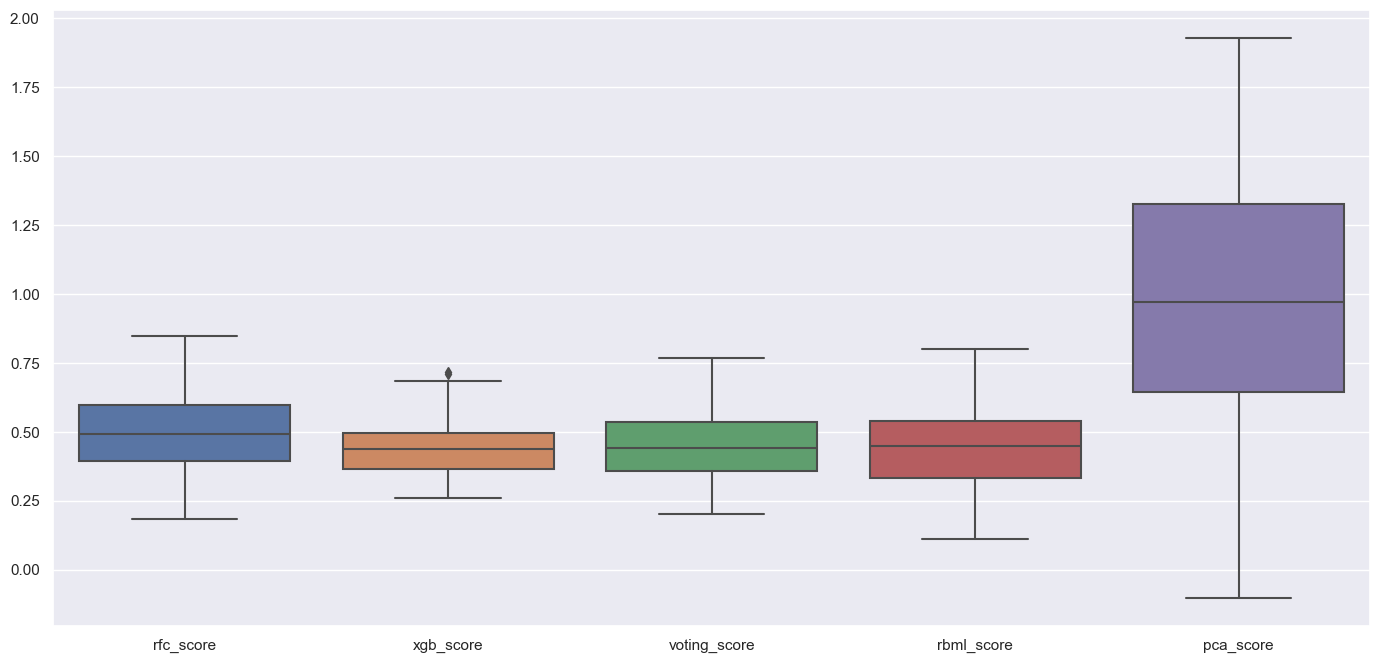

In [110]:
plt.figure(figsize=(17,8)) 
sns.boxplot(data=train_index[['rfc_score','xgb_score','voting_score','rbml_score','pca_score']])
plt.show()

In [111]:

final_index

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rfc_score,xgb_score,voting_score,rbml_score,pca_score
0,PP Chawla,CSK/KKR/KXIP/MI,0.573,0.640,0.566,0.676,0.445,0.075,0.527,0.550,3,0.509,0.438,0.442,0.525,-0.937
1,DJ Bravo,CSK/GL/MI,0.723,0.844,0.424,0.636,0.631,0.098,0.743,0.490,2,0.628,0.498,0.535,0.536,-1.298
2,B Kumar,PWI/SRH,0.539,0.535,0.700,0.868,0.473,0.173,0.489,0.461,3,0.497,0.458,0.461,0.511,-0.967
3,SP Narine,KKR,0.638,0.465,0.980,0.969,0.475,0.346,0.390,0.594,3,0.532,0.548,0.530,0.531,-0.933
4,R Ashwin,CSK/DC/KXIP/RPS/RR,0.398,0.295,0.848,0.825,0.275,0.038,0.346,0.616,1,0.392,0.393,0.362,0.349,-0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,PJ Sangwan,DC/GL/GT/KKR/MI,0.246,0.472,0.320,0.694,0.324,0.000,0.426,0.354,3,0.344,0.294,0.298,0.364,-0.697
66,DE Bollinger,CSK,1.000,0.945,0.818,0.786,0.888,0.278,0.958,0.626,0,0.846,0.708,0.756,0.752,-1.690
67,M Markande,MI/RR/SRH,0.448,0.681,0.249,0.611,0.439,0.406,0.315,0.398,3,0.425,0.422,0.426,0.442,-0.923
68,MS Gony,CSK/DCH/GL/KXIP,0.129,0.372,0.320,0.679,0.246,0.000,0.333,0.373,1,0.279,0.259,0.249,0.291,-0.519


In [112]:
from pathlib import Path

In [113]:
final_training_evaluation = bowler.copy()

In [114]:
final_training_evaluation = pd.merge(final_training_evaluation,final_index[['name','team','kmeans','rbml_score','pca_score']],on=['name','team'],how='left')

In [115]:
final_training_evaluation


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,rbml_score,pca_score
0,PP Chawla,CSK/KKR/KXIP/MI,26.60,20.05,7.96,20.149,1.005,0.010,0.974,26.743,35.289,Good,3,0.525,-0.937
1,DJ Bravo,CSK/GL/MI,23.82,17.04,8.38,19.728,1.158,0.013,1.122,27.595,33.269,Good,2,0.536,-1.298
2,B Kumar,PWI/SRH,27.23,21.60,7.56,22.207,1.028,0.023,0.948,28.006,34.310,Good,3,0.511,-0.967
3,SP Narine,KKR,25.39,22.63,6.73,23.283,1.029,0.046,0.880,26.120,28.479,Best,3,0.531,-0.933
4,R Ashwin,CSK/DC/KXIP/RPS/RR,29.82,25.13,7.12,21.750,0.865,0.005,0.850,25.812,35.386,Good,1,0.349,-0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,PJ Sangwan,DC/GL/GT/KKR/MI,32.63,22.52,8.69,20.343,0.905,0.000,0.905,29.524,47.259,Poor,3,0.364,-0.697
66,DE Bollinger,CSK,18.72,15.56,7.21,21.333,1.370,0.037,1.269,25.667,22.495,Best,0,0.752,-1.690
67,M Markande,MI/RR/SRH,28.89,19.45,8.90,19.459,1.000,0.054,0.829,28.892,42.854,Poor,3,0.442,-0.923
68,MS Gony,CSK/DCH/GL/KXIP,34.78,24.00,8.69,20.182,0.841,0.000,0.841,29.250,50.373,Poor,1,0.291,-0.519


In [116]:
final_training_evaluation['pca_score'] = final_training_evaluation['pca_score'] * -1 
final_training_evaluation['kmeans_role'] = final_training_evaluation['kmeans'].map({0:'SB',1:'SPB',2:'LCB',3:'IB'})


In [117]:
cols_final = final_training_evaluation.columns.tolist()
cols_final = ['name','team','average','strike_rate','economy','balls_bolwed_per_innings','wicket_index','big_impact_index','short_impact_index','runs_index','prelim_metric','pre-rank','kmeans','kmeans_role','rbml_score','pca_score']

In [118]:
final_training_evaluation = final_training_evaluation[cols_final]


In [119]:
final_training_evaluation[(final_training_evaluation.kmeans == 0)].sort_values('rbml_score',ascending = False).head(10)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
59,AJ Tye,GL/KXIP/LSG/RR,23.30,16.28,8.58,22.800,1.400,0.133,0.962,32.633,33.319,Good,0,SB,0.801,1.746
5,SL Malinga,MI,19.79,16.62,7.14,23.169,1.393,0.057,1.226,27.582,23.550,Best,0,SB,0.766,1.738
16,K Rabada,DC/PBKS,21.96,15.53,8.48,22.725,1.462,0.075,1.257,32.125,31.037,Best,0,SB,0.754,1.929
66,DE Bollinger,CSK,18.72,15.56,7.21,21.333,1.370,0.037,1.269,25.667,22.495,Best,0,SB,0.752,1.690
29,Imran Tahir,CSK/DC/RPS,20.76,16.04,7.76,22.292,1.390,0.051,1.250,28.864,26.850,Best,0,SB,0.729,1.756
51,MA Starc,KKR/RCB,22.29,16.29,8.20,21.277,1.308,0.051,1.162,29.154,30.463,Best,0,SB,0.669,1.596
52,NM Coulter-Nile,DC/KKR/MI/RR,22.91,17.85,7.70,22.500,1.263,0.053,1.111,28.947,29.401,Best,0,SB,0.655,1.497
56,S Aravind,RCB,23.08,16.88,8.20,19.958,1.184,0.053,1.028,27.342,31.543,Best,0,SB,0.625,1.331
36,MM Patel,GL/MI/RR,22.94,18.31,7.51,21.476,1.175,0.048,1.017,26.952,28.713,Best,0,SB,0.623,1.284
6,JJ Bumrah,MI,22.51,18.50,7.30,22.940,1.241,0.030,1.140,27.932,27.387,Best,0,SB,0.622,1.434


In [120]:
final_training_evaluation[(final_training_evaluation.kmeans == 1)].sort_values('rbml_score',ascending = False).head(10)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
42,SK Trivedi,RR,29.29,23.16,7.58,20.080,0.867,0.013,0.824,25.387,37.003,Good,1,SPB,0.357,0.575
4,R Ashwin,CSK/DC/KXIP/RPS/RR,29.82,25.13,7.12,21.750,0.865,0.005,0.850,25.812,35.386,Good,1,SPB,0.349,0.550
14,AR Patel,DC/KXIP,30.55,25.19,7.27,20.931,0.831,0.007,0.810,25.392,37.016,Good,1,SPB,0.313,0.464
68,MS Gony,CSK/DCH/GL/KXIP,34.78,24.00,8.69,20.182,0.841,0.000,0.841,29.250,50.373,Poor,1,SPB,0.291,0.519
64,DT Christian,DC/DCH/RCB/RPS,31.36,23.23,8.09,18.012,0.776,0.000,0.776,24.327,42.284,Poor,1,SPB,0.284,0.358
54,SB Jakati,CSK/GL/RCB,30.87,23.08,8.02,19.000,0.825,0.035,0.709,25.456,41.263,Average,1,SPB,0.283,0.457
22,I Sharma,DC/DCH/KKR/KXIP/RPS/SRH,34.47,25.09,8.24,20.973,0.836,0.009,0.798,28.836,47.339,Poor,1,SPB,0.268,0.477
30,IK Pathan,DC/GL/KXIP/RPS/SRH,33.11,25.53,7.77,20.216,0.792,0.000,0.792,26.228,42.877,Poor,1,SPB,0.264,0.364
7,RA Jadeja,CSK/GL/Kochi/RR,30.40,23.93,7.62,18.145,0.758,0.019,0.691,23.052,38.608,Average,1,SPB,0.254,0.285
58,MP Stoinis,DC/KXIP/LSG/RCB,29.62,18.67,9.51,12.919,0.694,0.016,0.639,20.548,46.948,Poor,1,SPB,0.251,0.230


In [121]:
filepath_bowler_evaluation_train = Path('final_training_evaluation_bowler.csv') 
final_training_evaluation.drop('kmeans',axis=1).to_csv(filepath_bowler_evaluation_train,index=False)

In [122]:
bowler_test=pd.read_csv('bowlers_test.csv')

In [123]:
bowler_test

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank
0,DL Chahar,CSK/RPS,28.84,21.67,7.98,20.600,0.951,0.025,0.873,27.420,38.357,Average
1,SR Watson,CSK/RCB/RR,29.15,22.05,7.93,19.320,0.876,0.010,0.846,25.543,38.527,Average
2,PP Ojha,DCH/MI,26.20,21.33,7.36,21.087,0.989,0.000,0.989,25.911,32.139,Good
3,JP Faulkner,GL/KXIP/PWI/RR,30.13,20.79,8.69,20.430,0.983,0.033,0.845,29.633,43.638,Poor
4,JC Archer,MI/RR,24.39,19.68,7.43,23.595,1.200,0.000,1.200,29.275,30.203,Best
...,...,...,...,...,...,...,...,...,...,...,...,...
25,A Nehra,CSK/DC/MI/PWI/SRH,23.53,18.00,7.84,21.682,1.205,0.011,1.172,28.352,30.746,Best
26,T Natarajan,KXIP/SRH,29.38,19.95,8.83,21.885,1.098,0.016,1.050,32.279,43.238,Poor
27,TG Southee,CSK/KKR/MI/RCB/RR,37.06,25.65,8.66,22.333,0.870,0.000,0.870,32.259,53.490,Poor
28,JD Unadkat,DC/KKR/LSG/MI/RCB/RPS/RR/SRH,32.21,21.52,8.97,20.487,0.952,0.019,0.873,30.663,48.154,Poor


In [125]:
bowler_test_for_clustering = bowler_test.copy().drop(['name','team','prelim_metric','pre-rank'],axis=1)
bowler_test_for_clustering

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,28.84,21.67,7.98,20.600,0.951,0.025,0.873,27.420
1,29.15,22.05,7.93,19.320,0.876,0.010,0.846,25.543
2,26.20,21.33,7.36,21.087,0.989,0.000,0.989,25.911
3,30.13,20.79,8.69,20.430,0.983,0.033,0.845,29.633
4,24.39,19.68,7.43,23.595,1.200,0.000,1.200,29.275
...,...,...,...,...,...,...,...,...
25,23.53,18.00,7.84,21.682,1.205,0.011,1.172,28.352
26,29.38,19.95,8.83,21.885,1.098,0.016,1.050,32.279
27,37.06,25.65,8.66,22.333,0.870,0.000,0.870,32.259
28,32.21,21.52,8.97,20.487,0.952,0.019,0.873,30.663


In [126]:
bowler_test_for_clustering_scaled = pd.DataFrame()


In [127]:
bowler_test_for_clustering_scaled['average'] = ((np.max(bowler_test_for_clustering['average'])) - bowler_test_for_clustering['average']) / (np.max(bowler_test_for_clustering['average']) - np.min(bowler_test_for_clustering['average']))
bowler_test_for_clustering_scaled['strike_rate'] = ((np.max(bowler_test_for_clustering['strike_rate'])) - bowler_test_for_clustering['strike_rate']) / (np.max(bowler_test_for_clustering['strike_rate']) - np.min(bowler_test_for_clustering['strike_rate']))
bowler_test_for_clustering_scaled['economy'] = ((np.max(bowler_test_for_clustering['economy'])) - bowler_test_for_clustering['economy']) / (np.max(bowler_test_for_clustering['economy']) - np.min(bowler_test_for_clustering['economy']))
bowler_test_for_clustering_scaled['runs_index'] = ((np.max(bowler_test_for_clustering['runs_index'])) - bowler_test_for_clustering['runs_index']) / (np.max(bowler_test_for_clustering['runs_index']) - np.min(bowler_test_for_clustering['runs_index']))


bowler_test_for_clustering_scaled['balls_bolwed_per_innings'] = (bowler_test_for_clustering['balls_bolwed_per_innings'] - np.min(bowler_test_for_clustering['balls_bolwed_per_innings'])) / (np.max(bowler_test_for_clustering['balls_bolwed_per_innings']) - np.min(bowler_test_for_clustering['balls_bolwed_per_innings']))
bowler_test_for_clustering_scaled['wicket_index'] = (bowler_test_for_clustering['wicket_index'] - np.min(bowler_test_for_clustering['wicket_index'])) / (np.max(bowler_test_for_clustering['wicket_index']) - np.min(bowler_test_for_clustering['wicket_index']))
bowler_test_for_clustering_scaled['big_impact_index'] = (bowler_test_for_clustering['big_impact_index'] - np.min(bowler_test_for_clustering['big_impact_index'])) / (np.max(bowler_test_for_clustering['big_impact_index']) - np.min(bowler_test_for_clustering['big_impact_index']))
bowler_test_for_clustering_scaled['short_impact_index'] = (bowler_test_for_clustering['short_impact_index'] - np.min(bowler_test_for_clustering['short_impact_index'])) / (np.max(bowler_test_for_clustering['short_impact_index']) - np.min(bowler_test_for_clustering['short_impact_index']))

In [128]:
bowler_test_for_clustering_scaled = pd.DataFrame(bowler_test_for_clustering_scaled,columns = columns)
bowler_test_for_clustering_scaled

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,0.527599,0.462613,0.542208,0.743051,0.577751,0.352113,0.484450,0.383513
1,0.507702,0.431389,0.558442,0.633236,0.488038,0.140845,0.452153,0.489421
2,0.697047,0.490551,0.743506,0.784832,0.623206,0.000000,0.623206,0.468657
3,0.444801,0.534922,0.311688,0.728466,0.616029,0.464789,0.450957,0.258647
4,0.813222,0.626130,0.720779,1.000000,0.875598,0.000000,0.875598,0.278847
...,...,...,...,...,...,...,...,...
25,0.868421,0.764174,0.587662,0.835879,0.881579,0.154930,0.842105,0.330926
26,0.492940,0.603944,0.266234,0.853294,0.753589,0.225352,0.696172,0.109349
27,0.000000,0.135579,0.321429,0.891730,0.480861,0.000000,0.480861,0.110478
28,0.311297,0.474938,0.220779,0.733356,0.578947,0.267606,0.484450,0.200530


In [130]:
bowler_test_scaled = bowler_test_for_clustering_scaled.copy()
bowler_test_scaled['name'] = bowler_test['name']
bowler_test_scaled['team'] = bowler_test['team']

cols = bowler_test_scaled.columns.tolist()
cols = cols[-2:] + cols[:-2]


bowler_test_scaled = bowler_test_scaled [cols]
bowler_test_scaled

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,DL Chahar,CSK/RPS,0.527599,0.462613,0.542208,0.743051,0.577751,0.352113,0.484450,0.383513
1,SR Watson,CSK/RCB/RR,0.507702,0.431389,0.558442,0.633236,0.488038,0.140845,0.452153,0.489421
2,PP Ojha,DCH/MI,0.697047,0.490551,0.743506,0.784832,0.623206,0.000000,0.623206,0.468657
3,JP Faulkner,GL/KXIP/PWI/RR,0.444801,0.534922,0.311688,0.728466,0.616029,0.464789,0.450957,0.258647
4,JC Archer,MI/RR,0.813222,0.626130,0.720779,1.000000,0.875598,0.000000,0.875598,0.278847
...,...,...,...,...,...,...,...,...,...,...
25,A Nehra,CSK/DC/MI/PWI/SRH,0.868421,0.764174,0.587662,0.835879,0.881579,0.154930,0.842105,0.330926
26,T Natarajan,KXIP/SRH,0.492940,0.603944,0.266234,0.853294,0.753589,0.225352,0.696172,0.109349
27,TG Southee,CSK/KKR/MI/RCB/RR,0.000000,0.135579,0.321429,0.891730,0.480861,0.000000,0.480861,0.110478
28,JD Unadkat,DC/KKR/LSG/MI/RCB/RPS/RR/SRH,0.311297,0.474938,0.220779,0.733356,0.578947,0.267606,0.484450,0.200530


In [131]:
ypred_test = kmodel.predict(bowler_test_for_clustering_scaled)
results_test = bowler_test_scaled
results_test['kmeans'] = ypred_test

In [132]:
results_mid = results_test.copy()
final_test_index = results_test.copy()
middle_ovr = pd.DataFrame()

In [138]:
results_0 = results_mid[results_mid['kmeans'] == 0]
results_1 = results_mid[results_mid['kmeans'] == 1]
results_2 = results_mid[results_mid['kmeans'] == 2]
results_3 = results_mid[results_mid['kmeans'] == 3]

In [139]:
results_0['rbml_score'] = 0
for i in columns:
  results_0['rbml_score'] = np.round(results_0['rbml_score'] + (results_0[i] * dict_0.get(i)),3)

In [140]:
middle_ovr = results_0.copy()

In [141]:
results_1['rbml_score'] = 0
for i in columns:
  results_1['rbml_score'] = np.round(results_1['rbml_score'] + (results_1[i] * dict_1.get(i)),3)

In [143]:
middle_ovr=pd.concat([middle_ovr, results_1])

In [144]:
results_2['rbml_score'] = 0
for i in columns:
  results_2['rbml_score'] = np.round(results_2['rbml_score'] + (results_2[i] * dict_2.get(i)),3)

In [145]:
middle_ovr=pd.concat([middle_ovr, results_2])

In [146]:
results_3['rbml_score'] = 0
for i in columns:
  results_3['rbml_score'] = np.round(results_3['rbml_score'] + (results_3[i] * dict_3.get(i)),3)

In [147]:
middle_ovr=pd.concat([middle_ovr, results_3])

In [148]:
middle_ovr

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score
4,JC Archer,MI/RR,0.813222,0.626130,0.720779,1.000000,0.875598,0.000000,0.875598,0.278847,0,0.566
5,A Mishra,DC/DCH/LSG/SRH,0.849807,0.651602,0.740260,0.759866,0.724880,0.436620,0.606459,0.486994,0,0.656
10,YS Chahal,MI/RCB/RR,0.938383,0.832375,0.587662,0.874485,0.982057,0.619718,0.825359,0.297579,0,0.788
12,A Kumble,RCB,0.869705,0.481512,1.000000,0.942862,0.721292,1.000000,0.422249,0.509338,0,0.795
15,P Awana,KXIP,0.685494,0.669680,0.451299,0.914636,0.854067,0.422535,0.748804,0.171246,0,0.615
...,...,...,...,...,...,...,...,...,...,...,...,...
18,Ravi Bishnoi,KXIP/LSG/PBKS,0.508344,0.403451,0.600649,0.837594,0.599282,0.000000,0.599282,0.336907,3,0.518
19,RD Chahar,MI/PBKS/RPS,0.546855,0.420707,0.629870,0.828844,0.605263,0.183099,0.557416,0.361790,3,0.529
21,DW Steyn,DCH/GL/RCB/SRH,0.719512,0.400164,0.889610,0.939345,0.661483,0.000000,0.661483,0.441065,3,0.607
24,R Bhatia,DC/KKR/RPS/RR,0.552632,0.350041,0.730519,0.516558,0.373206,0.154930,0.330144,0.678158,3,0.433


In [150]:
final_test_index = pd.merge(final_test_index,middle_ovr[['name','team','rbml_score']],on=['name','team'],how='left')


In [151]:
final_test_index


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score
0,DL Chahar,CSK/RPS,0.527599,0.462613,0.542208,0.743051,0.577751,0.352113,0.484450,0.383513,3,0.510
1,SR Watson,CSK/RCB/RR,0.507702,0.431389,0.558442,0.633236,0.488038,0.140845,0.452153,0.489421,3,0.471
2,PP Ojha,DCH/MI,0.697047,0.490551,0.743506,0.784832,0.623206,0.000000,0.623206,0.468657,3,0.588
3,JP Faulkner,GL/KXIP/PWI/RR,0.444801,0.534922,0.311688,0.728466,0.616029,0.464789,0.450957,0.258647,2,0.400
4,JC Archer,MI/RR,0.813222,0.626130,0.720779,1.000000,0.875598,0.000000,0.875598,0.278847,0,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...
25,A Nehra,CSK/DC/MI/PWI/SRH,0.868421,0.764174,0.587662,0.835879,0.881579,0.154930,0.842105,0.330926,0,0.628
26,T Natarajan,KXIP/SRH,0.492940,0.603944,0.266234,0.853294,0.753589,0.225352,0.696172,0.109349,2,0.381
27,TG Southee,CSK/KKR/MI/RCB/RR,0.000000,0.135579,0.321429,0.891730,0.480861,0.000000,0.480861,0.110478,3,0.312
28,JD Unadkat,DC/KKR/LSG/MI/RCB/RPS/RR/SRH,0.311297,0.474938,0.220779,0.733356,0.578947,0.267606,0.484450,0.200530,2,0.337


In [152]:
final_test_index['pca_score'] = 0
for i in columns:
  final_test_index['pca_score'] = np.round(final_test_index['pca_score'] + (final_test_index[i] * dict_pca.get(i)),3)


In [153]:
final_test_index


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,kmeans,rbml_score,pca_score
0,DL Chahar,CSK/RPS,0.527599,0.462613,0.542208,0.743051,0.577751,0.352113,0.484450,0.383513,3,0.510,-1.025
1,SR Watson,CSK/RCB/RR,0.507702,0.431389,0.558442,0.633236,0.488038,0.140845,0.452153,0.489421,3,0.471,-0.838
2,PP Ojha,DCH/MI,0.697047,0.490551,0.743506,0.784832,0.623206,0.000000,0.623206,0.468657,3,0.588,-1.086
3,JP Faulkner,GL/KXIP/PWI/RR,0.444801,0.534922,0.311688,0.728466,0.616029,0.464789,0.450957,0.258647,2,0.400,-1.097
4,JC Archer,MI/RR,0.813222,0.626130,0.720779,1.000000,0.875598,0.000000,0.875598,0.278847,0,0.566,-1.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,A Nehra,CSK/DC/MI/PWI/SRH,0.868421,0.764174,0.587662,0.835879,0.881579,0.154930,0.842105,0.330926,0,0.628,-1.596
26,T Natarajan,KXIP/SRH,0.492940,0.603944,0.266234,0.853294,0.753589,0.225352,0.696172,0.109349,2,0.381,-1.357
27,TG Southee,CSK/KKR/MI/RCB/RR,0.000000,0.135579,0.321429,0.891730,0.480861,0.000000,0.480861,0.110478,3,0.312,-0.695
28,JD Unadkat,DC/KKR/LSG/MI/RCB/RPS/RR/SRH,0.311297,0.474938,0.220779,0.733356,0.578947,0.267606,0.484450,0.200530,2,0.337,-1.002


In [154]:
final_evaluation_index = bowler_test.copy()


In [155]:
final_evaluation_index = pd.merge(final_evaluation_index,final_test_index[['name','team','kmeans','rbml_score','pca_score']],on=['name','team'],how='left')


In [156]:
final_evaluation_index

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,rbml_score,pca_score
0,DL Chahar,CSK/RPS,28.84,21.67,7.98,20.600,0.951,0.025,0.873,27.420,38.357,Average,3,0.510,-1.025
1,SR Watson,CSK/RCB/RR,29.15,22.05,7.93,19.320,0.876,0.010,0.846,25.543,38.527,Average,3,0.471,-0.838
2,PP Ojha,DCH/MI,26.20,21.33,7.36,21.087,0.989,0.000,0.989,25.911,32.139,Good,3,0.588,-1.086
3,JP Faulkner,GL/KXIP/PWI/RR,30.13,20.79,8.69,20.430,0.983,0.033,0.845,29.633,43.638,Poor,2,0.400,-1.097
4,JC Archer,MI/RR,24.39,19.68,7.43,23.595,1.200,0.000,1.200,29.275,30.203,Best,0,0.566,-1.547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,A Nehra,CSK/DC/MI/PWI/SRH,23.53,18.00,7.84,21.682,1.205,0.011,1.172,28.352,30.746,Best,0,0.628,-1.596
26,T Natarajan,KXIP/SRH,29.38,19.95,8.83,21.885,1.098,0.016,1.050,32.279,43.238,Poor,2,0.381,-1.357
27,TG Southee,CSK/KKR/MI/RCB/RR,37.06,25.65,8.66,22.333,0.870,0.000,0.870,32.259,53.490,Poor,3,0.312,-0.695
28,JD Unadkat,DC/KKR/LSG/MI/RCB/RPS/RR/SRH,32.21,21.52,8.97,20.487,0.952,0.019,0.873,30.663,48.154,Poor,2,0.337,-1.002


In [157]:
final_evaluation_index['pca_score'] = final_evaluation_index['pca_score'] * -1 
final_evaluation_index['kmeans_role'] = final_evaluation_index['kmeans'].map({0:'SB',1:'SPB',2:'LCB',3:'IB'})

In [158]:
final_evaluation_index = final_evaluation_index[cols_final]

In [159]:
final_evaluation_index[final_evaluation_index['pre-rank'] == 'Best']

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
4,JC Archer,MI/RR,24.39,19.68,7.43,23.595,1.200,0.000,1.200,29.275,30.203,Best,0,SB,0.566,1.547
5,A Mishra,DC/DCH/LSG/SRH,23.82,19.37,7.37,20.796,1.074,0.031,0.975,25.586,29.259,Best,0,SB,0.656,1.337
10,YS Chahal,MI/RCB/RR,22.44,17.17,7.84,22.132,1.289,0.044,1.158,28.943,29.322,Best,0,SB,0.788,1.814
12,A Kumble,RCB,23.51,21.44,6.57,22.929,1.071,0.071,0.821,25.190,25.743,Best,0,SB,0.795,1.331
16,MR Marsh,DC/DCH/PWI/RPS/SRH,21.48,15.13,8.51,16.447,1.088,0.059,0.906,23.382,30.466,Best,0,SB,0.808,1.482
20,RJ Harris,DCH/KXIP,23.26,18.48,7.55,22.443,1.216,0.027,1.139,28.297,29.269,Best,0,SB,0.691,1.632
21,DW Steyn,DCH/GL/RCB/SRH,25.85,22.43,6.91,22.888,1.021,0.000,1.021,26.400,29.771,Best,3,IB,0.607,1.134
25,A Nehra,CSK/DC/MI/PWI/SRH,23.53,18.00,7.84,21.682,1.205,0.011,1.172,28.352,30.746,Best,0,SB,0.628,1.596


In [160]:
final_evaluation_index.sort_values('rbml_score',ascending=False)

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
16,MR Marsh,DC/DCH/PWI/RPS/SRH,21.48,15.13,8.51,16.447,1.088,0.059,0.906,23.382,30.466,Best,0,SB,0.808,1.482
12,A Kumble,RCB,23.51,21.44,6.57,22.929,1.071,0.071,0.821,25.190,25.743,Best,0,SB,0.795,1.331
10,YS Chahal,MI/RCB/RR,22.44,17.17,7.84,22.132,1.289,0.044,1.158,28.943,29.322,Best,0,SB,0.788,1.814
20,RJ Harris,DCH/KXIP,23.26,18.48,7.55,22.443,1.216,0.027,1.139,28.297,29.269,Best,0,SB,0.691,1.632
5,A Mishra,DC/DCH/LSG/SRH,23.82,19.37,7.37,20.796,1.074,0.031,0.975,25.586,29.259,Best,0,SB,0.656,1.337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,HH Pandya,GT/MI,33.59,22.15,9.09,15.239,0.688,0.000,0.688,23.118,50.889,Poor,1,SPB,0.298,0.384
13,M Prasidh Krishna,KKR/RR,34.75,23.36,8.92,22.412,0.961,0.020,0.900,33.392,51.662,Poor,2,LCB,0.285,0.988
29,SM Curran,CSK/KXIP/PBKS,32.75,20.36,9.65,20.328,1.000,0.017,0.947,32.759,52.673,Poor,2,LCB,0.275,1.137
8,YK Pathan,KKR/RR/SRH,33.69,27.30,7.40,13.983,0.512,0.000,0.512,17.256,41.551,Average,1,SPB,0.141,-0.158


In [161]:
final_evaluation_index['pre-rank'].value_counts()

pre-rank
Poor       10
Best        8
Good        7
Average     5
Name: count, dtype: int64

In [162]:
final_evaluation_index['kmeans_role'].value_counts()


kmeans_role
IB     9
LCB    9
SB     9
SPB    3
Name: count, dtype: int64

In [163]:
final_evaluation_index[(final_evaluation_index['kmeans_role'] != 'LCB') & (final_evaluation_index['pre-rank'] == 'Poor') ]

,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
6,HH Pandya,GT/MI,33.59,22.15,9.09,15.239,0.688,0.0,0.688,23.118,50.889,Poor,1,SPB,0.298,0.384
9,GJ Maxwell,DC/KXIP/MI/RCB,35.21,25.51,8.28,11.939,0.468,0.0,0.468,16.494,48.590,Poor,1,SPB,0.114,-0.227
27,TG Southee,CSK/KKR/MI/RCB/RR,37.06,25.65,8.66,22.333,0.870,0.0,0.870,32.259,53.490,Poor,3,IB,0.312,0.695


In [164]:
final_evaluation_index[(final_evaluation_index['kmeans_role'] == 'LCB') & (final_evaluation_index['pre-rank'] != 'Poor') ]


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
11,A Nortje,DC,26.23,17.56,8.96,22.878,1.304,0.000,1.304,34.217,39.170,Average,2,LCB,0.413,1.795
17,Mustafizur Rahman,CSK/DC/MI/RR/SRH,28.88,21.27,8.14,22.758,1.070,0.018,1.018,30.912,39.181,Average,2,LCB,0.442,1.279


In [165]:
final_evaluation_index[(final_evaluation_index['kmeans_role'] == 'SB')]['pre-rank'].value_counts()


pre-rank
Best    7
Good    2
Name: count, dtype: int64

In [166]:
final_evaluation_index[(final_evaluation_index['pre-rank']=='Best')].drop('kmeans',axis=1)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans_role,rbml_score,pca_score
4,JC Archer,MI/RR,24.39,19.68,7.43,23.595,1.200,0.000,1.200,29.275,30.203,Best,SB,0.566,1.547
5,A Mishra,DC/DCH/LSG/SRH,23.82,19.37,7.37,20.796,1.074,0.031,0.975,25.586,29.259,Best,SB,0.656,1.337
10,YS Chahal,MI/RCB/RR,22.44,17.17,7.84,22.132,1.289,0.044,1.158,28.943,29.322,Best,SB,0.788,1.814
12,A Kumble,RCB,23.51,21.44,6.57,22.929,1.071,0.071,0.821,25.190,25.743,Best,SB,0.795,1.331
16,MR Marsh,DC/DCH/PWI/RPS/SRH,21.48,15.13,8.51,16.447,1.088,0.059,0.906,23.382,30.466,Best,SB,0.808,1.482
20,RJ Harris,DCH/KXIP,23.26,18.48,7.55,22.443,1.216,0.027,1.139,28.297,29.269,Best,SB,0.691,1.632
21,DW Steyn,DCH/GL/RCB/SRH,25.85,22.43,6.91,22.888,1.021,0.000,1.021,26.400,29.771,Best,IB,0.607,1.134
25,A Nehra,CSK/DC/MI/PWI/SRH,23.53,18.00,7.84,21.682,1.205,0.011,1.172,28.352,30.746,Best,SB,0.628,1.596


In [167]:
final_evaluation_index.sort_values('rbml_score',ascending=False)


,name,team,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,kmeans,kmeans_role,rbml_score,pca_score
16,MR Marsh,DC/DCH/PWI/RPS/SRH,21.48,15.13,8.51,16.447,1.088,0.059,0.906,23.382,30.466,Best,0,SB,0.808,1.482
12,A Kumble,RCB,23.51,21.44,6.57,22.929,1.071,0.071,0.821,25.190,25.743,Best,0,SB,0.795,1.331
10,YS Chahal,MI/RCB/RR,22.44,17.17,7.84,22.132,1.289,0.044,1.158,28.943,29.322,Best,0,SB,0.788,1.814
20,RJ Harris,DCH/KXIP,23.26,18.48,7.55,22.443,1.216,0.027,1.139,28.297,29.269,Best,0,SB,0.691,1.632
5,A Mishra,DC/DCH/LSG/SRH,23.82,19.37,7.37,20.796,1.074,0.031,0.975,25.586,29.259,Best,0,SB,0.656,1.337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,HH Pandya,GT/MI,33.59,22.15,9.09,15.239,0.688,0.000,0.688,23.118,50.889,Poor,1,SPB,0.298,0.384
13,M Prasidh Krishna,KKR/RR,34.75,23.36,8.92,22.412,0.961,0.020,0.900,33.392,51.662,Poor,2,LCB,0.285,0.988
29,SM Curran,CSK/KXIP/PBKS,32.75,20.36,9.65,20.328,1.000,0.017,0.947,32.759,52.673,Poor,2,LCB,0.275,1.137
8,YK Pathan,KKR/RR/SRH,33.69,27.30,7.40,13.983,0.512,0.000,0.512,17.256,41.551,Average,1,SPB,0.141,-0.158


In [168]:
filepath_bowler_evaluation_test = Path('final_test_evaluation_bowler.csv') 
final_evaluation_index.drop('kmeans',axis=1).to_csv(filepath_bowler_evaluation_test,index=False)